# House Price Prediction using Linear Regression

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [3]:
#reading the data
data = pd.read_csv('train.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# checking column names
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Data preprocessing

In [6]:
# defining only essential features
features = ['GrLivArea', 'FullBath', 'BedroomAbvGr', 'SalePrice']

In [7]:
df = data[features]

In [8]:
df.head()

,GrLivArea,FullBath,BedroomAbvGr,SalePrice
0,1710,2,3,208500
1,1262,2,3,181500
2,1786,2,3,223500
3,1717,1,3,140000
4,2198,2,4,250000


In [9]:
# checking if there is any null values in the dataset
df.isnull().sum()

GrLivArea       0
FullBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   FullBath      1460 non-null   int64
 2   BedroomAbvGr  1460 non-null   int64
 3   SalePrice     1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


In [11]:
# mathematical outlook of the data
df.describe()

,GrLivArea,FullBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,1.565068,2.866438,180921.195890
std,525.480383,0.550916,0.815778,79442.502883
min,334.000000,0.000000,0.000000,34900.000000
25%,1129.500000,1.000000,2.000000,129975.000000
50%,1464.000000,2.000000,3.000000,163000.000000
75%,1776.750000,2.000000,3.000000,214000.000000
max,5642.000000,3.000000,8.000000,755000.000000


# Data Visualization

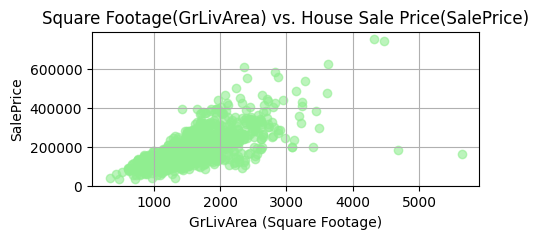

In [12]:
plt.figure(figsize=(5,2))
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.6, color='lightgreen')
plt.xlabel('GrLivArea (Square Footage)')
plt.ylabel('SalePrice')
plt.title('Square Footage(GrLivArea) vs. House Sale Price(SalePrice)')
plt.grid(True)
plt.show()

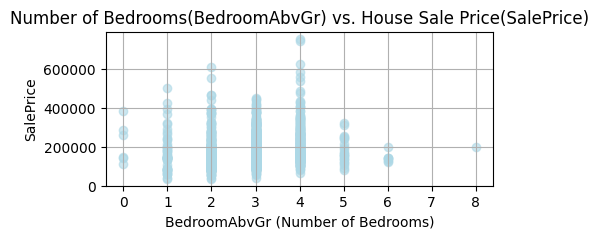

In [13]:
plt.figure(figsize=(5,2))
plt.scatter(df['BedroomAbvGr'], df['SalePrice'], alpha=0.6, color='lightblue')
plt.xlabel('BedroomAbvGr (Number of Bedrooms)')
plt.ylabel('SalePrice')
plt.title('Number of Bedrooms(BedroomAbvGr) vs. House Sale Price(SalePrice)')
plt.grid(True)
plt.show()

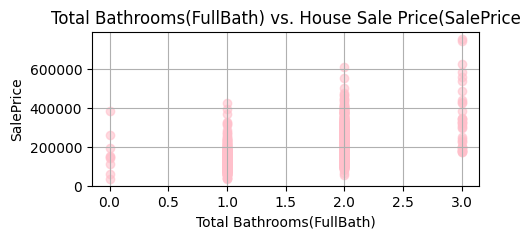

In [14]:
plt.figure(figsize=(5,2))
plt.scatter(df['FullBath'], df['SalePrice'], alpha=0.6, color='pink')
plt.xlabel('Total Bathrooms(FullBath)')
plt.ylabel('SalePrice')
plt.title('Total Bathrooms(FullBath) vs. House Sale Price(SalePrice')
plt.grid(True)
plt.show()

In [15]:
# defining independent and dependent fetures
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = df['SalePrice']

# Splitting the data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model fitting

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

# prediction

In [23]:
y_pred = reg_model.predict(X_test)

In [24]:
y_pred

array([113410.67255295, 305081.87775905, 135904.7856298 , 205424.67564125,
       227502.68349005, 121157.48079624, 205577.98056587, 183787.20378269,
       121157.48079624, 147219.22233195, 185971.75622995,  93229.56899256,
       121965.26049015, 192005.28203666, 208129.35962357, 133824.25948955,
       211250.14883394, 146931.57417311, 134240.3647176 , 186179.80884397,
       219884.33231596, 197726.72892234, 185867.72992293, 126334.36538467,
       181186.54610738, 183707.60823786, 171720.15216926, 118844.47127978,
       199183.09722051, 199623.63321075, 132551.51304322, 245162.72491995,
       383364.40832172, 127998.78629686, 202511.9390449 , 120484.46142979,
       200376.66521525, 206232.45533516, 241160.86372911, 120716.944806  ,
       124645.51371028, 251820.40856874, 101135.5683255 , 244746.61969191,
       105088.56799197, 208912.70855529, 123837.73401637, 101655.69986056,
       271169.30167303, 160846.66855057, 105088.56799197, 221989.2892184 ,
       137960.88100786, 3

# Evaluate the regression model using R² score and Mean Squared Error

In [25]:
score = r2_score(y_test, y_pred)
score

0.6341189942329308

In [26]:
mse = mean_squared_error(y_test, y_pred)
mse

2806426667.247134

In [27]:
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {score:.2f}")


Model Evaluation Metrics:
Mean Squared Error: 2806426667.25
R^2 Score: 0.63


# Predicted vs Actual Values Plot

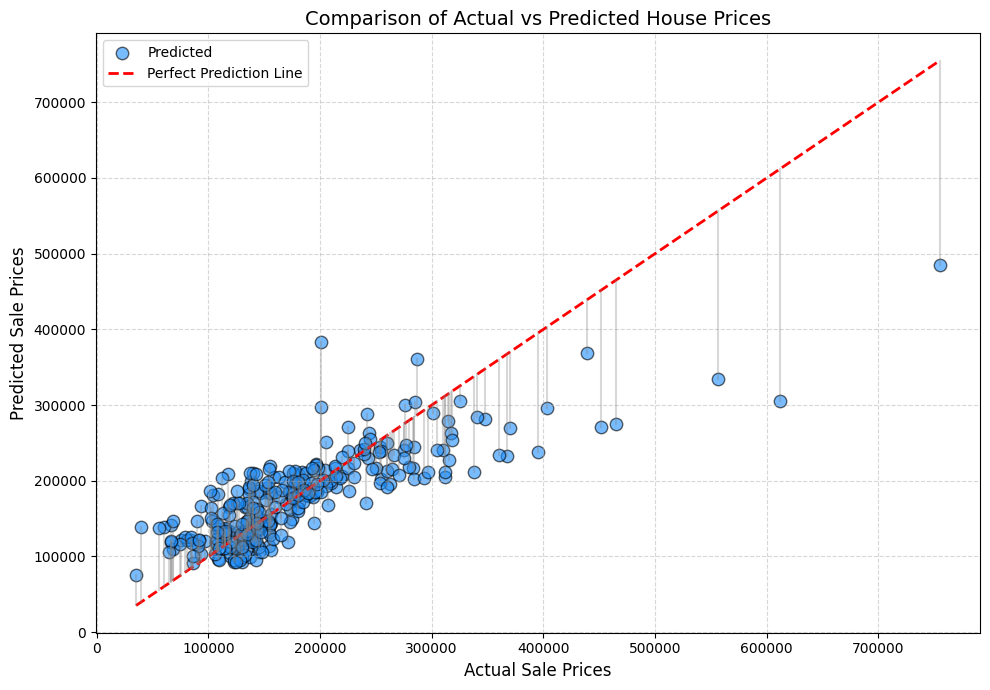

In [28]:
plt.figure(figsize=(10, 7))

plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.6, edgecolor='k', s=80, label='Predicted')

# Line for perfect predictions
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')

# Error lines
for actual, predicted in zip(y_test, y_pred):
    plt.plot([actual, actual], [actual, predicted], color='grey', alpha=0.3) 

plt.xlabel("Actual Sale Prices", fontsize=12)
plt.ylabel("Predicted Sale Prices", fontsize=12)
plt.title("Comparison of Actual vs Predicted House Prices", fontsize=14)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()